# <font color=red>Capstone Week 4- Final Assignment</font>

## <font color=blue>Problem: </font> Where to open an Italian Restaurant in Boston?
### <font color=blue>Writer: </font> Deniz Aytemiz

## <font color=red>Introduction/Business Problem: </font>
   __In this project, the best location for opening an Italian Restaurant in Boston will be examined. The criterias will be low rate of crime, popularity of the area, number of other Italian restaurants in the area, housing for rent prices and rankings of the Italian restaurants in that area. By area I mean locations determined by distinct postal codes. The areas will be segmented according to their competitiveness, safeness, cheapness and popularity. This analysis  might be useful for those want to open Italian Restaurant in Boston and want to know where would be most advantegous.__

## <font color=red>Data: </font>
__The Foursquare data is used for observing number of Italian Restaurants in specific areas(postal codes) in addition to their ratings. I used trending venue API request of Foursquare for an indication of popularity of the areas, however query returned no trending venue result. Therefore to gain insight on the popularity of the area, I examine the the number of tips for venues in a location. The more entries, the more popularity is indicated. In addition to Foursquare data from Boston's goverment website, I  retrieved a dataset on the prices of houses as well as a dataset about the crimes in the city. These datasets are analyzed for crime rates and housing prices of the postal code areas.__

In [2]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

     |████████████████████████████████| 79 kB 8.9 MB/s  eta 0:00:01
  Created wheel for folium: filename=folium-0.5.0-py3-none-any.whl size=76240 sha256=0f37374cb5d0ef49fddcf069c2de890b96c296beb4fa6da2e328ef5c32ee9c0e
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/b2/2f/2c/109e446b990d663ea5ce9b078b5e7c1a9c45cca91f377080f8
Successfully built folium
Folium installed
Libraries imported.


## 1st data set from boston.gov, the housing prices are given.

In [3]:
other_path = "https://data.boston.gov/dataset/e02c44d2-3c64-459c-8fe2-e1ce5f38a035/resource/695a8596-5458-442b-a017-7cd72471aade/download/fy19fullpropassess.csv"
df = pd.read_csv(other_path, header=0)


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (15,60) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,ST_NAME_SUF,UNIT_NUM,ZIPCODE,PTYPE,LU,...,U_BTH_STYLE2,U_BTH_STYLE3,U_KITCH_TYPE,U_KITCH_STYLE,U_HEAT_TYP,U_AC,U_FPLACE,U_INT_FIN,U_INT_CND,U_VIEW
0,502550008,502550000.0,502550000,87,BEACON,ST,2-F,2108.0,102,CD,...,M,NaN,O,M,W,N,1.0,N,G,A
1,502550010,502550000.0,502550000,87,BEACON,ST,2-R,2108.0,102,CD,...,NaN,NaN,O,S,W,N,1.0,N,A,A
2,502550012,502550000.0,502550000,87,BEACON,ST,3-F,2108.0,102,CD,...,S,NaN,O,M,W,N,1.0,N,A,G
3,502550014,502550000.0,502550000,87,BEACON,ST,3-R,2108.0,102,CD,...,NaN,NaN,O,N,W,N,1.0,S,A,G
4,502550016,502550000.0,502550000,87,BEACON,ST,4,2108.0,102,CD,...,M,M,O,L,W,C,2.0,N,E,G


## The needed columns are taken, others are dropped. This dataframe will be used later on. 

In [5]:
data_price = df[['ZIPCODE','ST_NAME','AV_TOTAL']]
data_price.head()

,ZIPCODE,ST_NAME,AV_TOTAL
0,2108.0,BEACON,878200
1,2108.0,BEACON,817600
2,2108.0,BEACON,849500
3,2108.0,BEACON,734400
4,2108.0,BEACON,2162300


In [6]:
data_price=data_price.head(100)

In [7]:
data_price.shape

(100, 3)

## 2nd datafarem from boston.gov, this dataset gives crime incidents in Boston

In [8]:
other_path = "https://data.boston.gov/dataset/6220d948-eae2-4e4b-8723-2dc8e67722a3/resource/12cb3883-56f5-47de-afa5-3b1cf61b257b/download/tmpcq9l0azx.csv"
df_crime = pd.read_csv(other_path, header=0)



/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,2,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
df_crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,TESTTEST2,423,NaN,ASSAULT - AGGRAVATED,External,,0,2019-10-16 00:00:00,2019,10,Wednesday,0,NaN,RIVERVIEW DR,NaN,NaN,"(0.00000000, 0.00000000)"
1,S97333701,3301,NaN,VERBAL DISPUTE,C6,915,0,2020-07-18 14:34:00,2020,7,Saturday,14,NaN,MARY BOYLE WAY,42.330813,-71.051368,"(42.33081300, -71.05136800)"
2,S47513131,2647,NaN,THREATS TO DO BODILY HARM,E18,530,0,2020-06-24 10:15:00,2020,6,Wednesday,10,NaN,READVILLE ST,42.239491,-71.135954,"(42.23949100, -71.13595400)"
3,I92102201,3301,NaN,VERBAL DISPUTE,E13,583,0,2019-12-20 03:08:00,2019,12,Friday,3,NaN,DAY ST,42.325122,-71.107779,"(42.32512200, -71.10777900)"
4,I92097173,3115,NaN,INVESTIGATE PERSON,C11,355,0,2019-10-23 00:00:00,2019,10,Wednesday,0,NaN,GIBSON ST,42.297555,-71.059709,"(42.29755500, -71.05970900)"


## Columns needed are retrieved, others dropped

In [10]:
data_crime = df_crime[['DISTRICT','STREET','Lat','Long']]
data_crime.head()

,DISTRICT,STREET,Lat,Long
0,External,RIVERVIEW DR,NaN,NaN
1,C6,MARY BOYLE WAY,42.330813,-71.051368
2,E18,READVILLE ST,42.239491,-71.135954
3,E13,DAY ST,42.325122,-71.107779
4,C11,GIBSON ST,42.297555,-71.059709


In [11]:
data_crime=data_crime.head(100)

In [12]:
data_crime.shape

(100, 4)

## The place of crime is given as District, we will convert this to postal codes later on.

In [13]:
data_crime.DISTRICT.unique()

array(['External', 'C6', 'E18', 'E13', 'C11', 'D14', 'B2', 'A15', nan,
       'E5', 'A1', 'B3', 'A7', 'D4'], dtype=object)

In [14]:
data_crime=data_crime.dropna(subset=["DISTRICT"], axis=0)

In [15]:
data_crime

,DISTRICT,STREET,Lat,Long
0,External,RIVERVIEW DR,NaN,NaN
1,C6,MARY BOYLE WAY,42.330813,-71.051368
2,E18,READVILLE ST,42.239491,-71.135954
3,E13,DAY ST,42.325122,-71.107779
4,C11,GIBSON ST,42.297555,-71.059709
...,...,...,...,...
95,C11,COLUMBIA RD,42.309692,-71.072859
96,C11,LESLIE ST,42.295147,-71.058608
97,A7,LONDON ST,42.375684,-71.036249
98,B2,CEDRIC ST,42.325714,-71.071317


## External entries in District column is dropped

In [16]:
data_crime = data_crime[data_crime.DISTRICT != 'External']

In [17]:
data_crime

,DISTRICT,STREET,Lat,Long
1,C6,MARY BOYLE WAY,42.330813,-71.051368
2,E18,READVILLE ST,42.239491,-71.135954
3,E13,DAY ST,42.325122,-71.107779
4,C11,GIBSON ST,42.297555,-71.059709
5,D14,BROOKS ST,42.355120,-71.162678
...,...,...,...,...
95,C11,COLUMBIA RD,42.309692,-71.072859
96,C11,LESLIE ST,42.295147,-71.058608
97,A7,LONDON ST,42.375684,-71.036249
98,B2,CEDRIC ST,42.325714,-71.071317


## Instead of district, the place is replaced with postal codes

In [18]:
data_crime['DISTRICT'] = data_crime['DISTRICT'].replace(['C6','E18','E13','C11','D14','B2','A15','E5','A1','B3','A7','D4'],['02127','02136','02130','02122','02135','02119','02114','02132','02114','02124','02128','02116'])


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [19]:
data_crime

,DISTRICT,STREET,Lat,Long
1,02127,MARY BOYLE WAY,42.330813,-71.051368
2,02136,READVILLE ST,42.239491,-71.135954
3,02130,DAY ST,42.325122,-71.107779
4,02122,GIBSON ST,42.297555,-71.059709
5,02135,BROOKS ST,42.355120,-71.162678
...,...,...,...,...
95,02122,COLUMBIA RD,42.309692,-71.072859
96,02122,LESLIE ST,42.295147,-71.058608
97,02128,LONDON ST,42.375684,-71.036249
98,02119,CEDRIC ST,42.325714,-71.071317


## Which district has how many crime incidents recored is observed

In [20]:
data_crime['DISTRICT'].value_counts()


02124    13
02114    13
02119    12
02128    12
02130    10
02136     9
02122     8
02135     7
02127     6
02116     4
02132     4
Name: DISTRICT, dtype: int64

In [21]:
new_data = {'postalCode':  ['02124', '02119','02128','02114','02130','02136','02122','02135' ,'02127','02118','02132','02120'],
        'number of Crimes': [13, 12,12,10,10,9,8,7,6,4,4,3]
        }
df_crime = pd.DataFrame (new_data, columns = ['postalCode','number of Crimes'])

df_crime

,postalCode,number of Crimes
0,02124,13
1,02119,12
2,02128,12
3,02114,10
4,02130,10
5,02136,9
6,02122,8
7,02135,7
8,02127,6
9,02118,4


In [22]:
data_price

,ZIPCODE,ST_NAME,AV_TOTAL
0,2108.0,BEACON,878200
1,2108.0,BEACON,817600
2,2108.0,BEACON,849500
3,2108.0,BEACON,734400
4,2108.0,BEACON,2162300
...,...,...,...
95,2128.0,PRINCETON,658300
96,2128.0,PRINCETON,615030
97,2128.0,PRINCETON,615030
98,2128.0,PRINCETON,663800


## Street names in house price dataset are replaced with postal codes

In [23]:
data_price.ST_NAME.unique()

array(['BEACON', 'BEAVER', 'BRIMMER', 'PUTNAM', 'LEXINGTON', 'PRESCOTT',
       'PRINCETON'], dtype=object)

In [24]:
data_price['ST_NAME'] = data_price['ST_NAME'].replace(['BEACON','BEAVER','BRIMMER','PUTNAM','LEXINGTON','PRESCOTT','PRINCETON'],['02108 ','02108','02108','02110','02128','02136','02128'])


In [25]:
data_price

,ZIPCODE,ST_NAME,AV_TOTAL
0,2108.0,02108,878200
1,2108.0,02108,817600
2,2108.0,02108,849500
3,2108.0,02108,734400
4,2108.0,02108,2162300
...,...,...,...
95,2128.0,02128,658300
96,2128.0,02128,615030
97,2128.0,02128,615030
98,2128.0,02128,663800


### Foursquare data

In [26]:
CLIENT_ID = 'AWYBVOQRZDAUENRKYQ1UG1K3IBFBHYCUCXSUIJFBA4VSR4LE' # your Foursquare ID
CLIENT_SECRET = 'J4RO3S4IZA3HYTX2EFNCQEESQDIFLOMCGSIGURV2RRIZCKYO' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: AWYBVOQRZDAUENRKYQ1UG1K3IBFBHYCUCXSUIJFBA4VSR4LE
CLIENT_SECRET:J4RO3S4IZA3HYTX2EFNCQEESQDIFLOMCGSIGURV2RRIZCKYO


## latitude and longitude values of Boston

In [27]:
latitude=42.361145
longitude=-71.057083
radius=500

In [28]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=AWYBVOQRZDAUENRKYQ1UG1K3IBFBHYCUCXSUIJFBA4VSR4LE&client_secret=J4RO3S4IZA3HYTX2EFNCQEESQDIFLOMCGSIGURV2RRIZCKYO&ll=42.361145,-71.057083&v=20180604&radius=500&limit=100'

In [29]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [30]:
import requests
results = requests.get(url).json()
items = results['response']['groups'][0]['items']
items[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '4ba50617f964a520f1d138e3',
  'name': 'North End Park',
  'location': {'address': 'Cross St.',
   'crossStreet': 'btwn North & Sudbury',
   'lat': 42.36248823184806,
   'lng': -71.05647696102726,
   'labeledLatLngs': [{'label': 'display',
     'lat': 42.36248823184806,
     'lng': -71.05647696102726}],
   'distance': 157,
   'postalCode': '02113',
   'cc': 'US',
   'city': 'Boston',
   'state': 'MA',
   'country': 'United States',
   'formattedAddress': ['Cross St. (btwn North & Sudbury)',
    'Boston, MA 02113',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d163941735',
    'name': 'Park',
    'pluralName': 'Parks',
    'shortName': 'Park',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_',
     'suffix': '.png'},
    'primary': True}],
  'photos': {'count': 0, 'groups': []}},

In [31]:
dataframe = json_normalize(items) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head(50)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if __name__ == '__main__':


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,North End Park,Park,Cross St.,btwn North & Sudbury,42.362488,-71.056477,"[{'label': 'display', 'lat': 42.36248823184806...",157,02113,US,Boston,MA,United States,"[Cross St. (btwn North & Sudbury), Boston, MA ...",NaN,4ba50617f964a520f1d138e3
1,The Rose Kennedy Greenway - Mothers Walk,Park,NaN,NaN,42.362640,-71.056407,"[{'label': 'display', 'lat': 42.36263981588581...",175,NaN,US,Boston,MA,United States,"[Boston, MA, United States]",NaN,51743d0ce4b0d8599417b780
2,Boston Public Market,Market,100 Hanover St,btwn Sudbury & Congress St,42.361950,-71.057466,"[{'label': 'display', 'lat': 42.36194982978392...",94,02108,US,Boston,MA,United States,"[100 Hanover St (btwn Sudbury & Congress St), ...",NaN,55b95c01498e77bdd5be7a96
3,Faneuil Hall Marketplace,Historic Site,1 S Market St,at Congress St & North St,42.359978,-71.056410,"[{'label': 'display', 'lat': 42.35997750557642...",141,02109,US,Boston,MA,United States,"[1 S Market St (at Congress St & North St), Bo...",Downtown Boston,4b3d563ff964a520a49225e3
4,Saus Restaurant,Belgian Restaurant,33 Union St,Marsh Lane,42.361076,-71.057054,"[{'label': 'display', 'lat': 42.36107632380333...",8,02108,US,Boston,MA,United States,"[33 Union St (Marsh Lane), Boston, MA 02108, U...",NaN,4bf18c843506ef3bea63bd22
5,Red's Best,Seafood Restaurant,100 Hanover St,NaN,42.361960,-71.057587,"[{'label': 'display', 'lat': 42.36196033446922...",99,02108,US,Boston,MA,United States,"[100 Hanover St, Boston, MA 02108, United States]",NaN,565f3316498e9ca911292760
6,Quincy Market,Historic Site,1 Faneuil Hall Sq,btwn Clinton & Chatham,42.360106,-71.054881,NaN,214,02109,US,Boston,MA,United States,"[1 Faneuil Hall Sq (btwn Clinton & Chatham), B...",NaN,4a1b3cd9f964a520db7a1fe3
7,Red Apple Farm,Bakery,100 Hanover St,NaN,42.361827,-71.057536,"[{'label': 'display', 'lat': 42.36182685816394...",84,02108,US,Boston,MA,United States,"[100 Hanover St, Boston, MA 02108, United States]",Downtown Boston,563f7d83cd108b8d94e3e859
8,George Howell Coffee,Coffee Shop,100 Hanover St,NaN,42.361832,-71.057445,"[{'label': 'display', 'lat': 42.361831810881, ...",82,02108,US,Boston,MA,United States,"[100 Hanover St, Boston, MA 02108, United States]",NaN,55c7541b498e1c44d8c3e506
9,Neptune Oyster,Seafood Restaurant,63 Salem St,at Morton St,42.363237,-71.056139,"[{'label': 'display', 'lat': 42.36323650143622...",245,02113,US,Boston,MA,United States,"[63 Salem St (at Morton St), Boston, MA 02113,...",NaN,4ac53112f964a520dbb020e3


## Redundant columns are eliminated

In [32]:
df=dataframe_filtered[['categories','postalCode','lat','lng','id']]
df=df.dropna(subset=["postalCode"], axis=0)
df

,categories,postalCode,lat,lng,id
0,Park,02113,42.362488,-71.056477,4ba50617f964a520f1d138e3
2,Market,02108,42.361950,-71.057466,55b95c01498e77bdd5be7a96
3,Historic Site,02109,42.359978,-71.056410,4b3d563ff964a520a49225e3
4,Belgian Restaurant,02108,42.361076,-71.057054,4bf18c843506ef3bea63bd22
5,Seafood Restaurant,02108,42.361960,-71.057587,565f3316498e9ca911292760
...,...,...,...,...,...
95,Lingerie Store,02109,42.359803,-71.054357,4b54e636f964a52019d227e3
96,Pizza Place,02113,42.365394,-71.056883,4ae4b71af964a520629d21e3
97,Italian Restaurant,02113,42.364169,-71.055559,4aeb408ef964a52023c021e3
98,Tourist Information Center,02110,42.360232,-71.052371,4e340b82483b5fa58752a25a


## Finding out number of Italian Restaurants

In [33]:
d=dataframe_filtered.loc[dataframe_filtered['categories'] == 'Italian Restaurant']


In [34]:
df_new = d.groupby(['postalCode', 'categories']).count()
df_new

,,name,address,crossStreet,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,neighborhood,id
postalCode,categories,,,,,,,,,,,,,,
02108,Italian Restaurant,1,1,0,1,1,1,1,1,1,1,1,1,0,1
02109,Italian Restaurant,1,1,1,1,1,1,1,1,1,1,1,1,0,1
02113,Italian Restaurant,14,14,9,14,14,14,14,14,14,14,14,14,0,14


In [35]:
df.postalCode.unique()

array(['02113', '02108', '02109', '02114', '02201-1001', '02110'],
      dtype=object)

## New dataframe with postal codes and number of Italian Restaurants 

In [36]:
data = {'postalCode':  ['02113', '02108','02109','02114','02110','02111','02201-1001'],
        'number of Italian Restaurants': ['15', '1','1','0','0','0','0']
        }

In [37]:
df2 = pd.DataFrame (data, columns = ['postalCode','number of Italian Restaurants'])

df2

,postalCode,number of Italian Restaurants
0,02113,15
1,02108,1
2,02109,1
3,02114,0
4,02110,0
5,02111,0
6,02201-1001,0


In [38]:
combined_data = df.join(df2.set_index('postalCode'), on='postalCode', how='inner')
combined_data

,categories,postalCode,lat,lng,id,number of Italian Restaurants
0,Park,02113,42.362488,-71.056477,4ba50617f964a520f1d138e3,15
9,Seafood Restaurant,02113,42.363237,-71.056139,4ac53112f964a520dbb020e3,15
12,Sandwich Place,02113,42.363292,-71.056068,4dea5487d164ef597ce79171,15
15,Comedy Club,02113,42.362931,-71.055404,40b28c80f964a520d5f71ee3,15
16,Deli / Bodega,02113,42.363071,-71.055041,53a74381498e34ef9a6217ea,15
...,...,...,...,...,...,...
46,Ski Chalet,02114,42.363679,-71.059239,53dff5aa498e8db166762d66,0
51,Coffee Shop,02114,42.363144,-71.059830,51a49c41498e034cea66e562,0
87,Plaza,02201-1001,42.359652,-71.059477,4a74b8c9f964a5205edf1fe3,0
94,Park,02110,42.361027,-71.051451,4ae3580af964a520c59321e3,0


In [39]:
combined_data=combined_data.reset_index()

combined_data

,index,categories,postalCode,lat,lng,id,number of Italian Restaurants
0,0,Park,02113,42.362488,-71.056477,4ba50617f964a520f1d138e3,15
1,9,Seafood Restaurant,02113,42.363237,-71.056139,4ac53112f964a520dbb020e3,15
2,12,Sandwich Place,02113,42.363292,-71.056068,4dea5487d164ef597ce79171,15
3,15,Comedy Club,02113,42.362931,-71.055404,40b28c80f964a520d5f71ee3,15
4,16,Deli / Bodega,02113,42.363071,-71.055041,53a74381498e34ef9a6217ea,15
...,...,...,...,...,...,...,...
91,46,Ski Chalet,02114,42.363679,-71.059239,53dff5aa498e8db166762d66,0
92,51,Coffee Shop,02114,42.363144,-71.059830,51a49c41498e034cea66e562,0
93,87,Plaza,02201-1001,42.359652,-71.059477,4a74b8c9f964a5205edf1fe3,0
94,94,Park,02110,42.361027,-71.051451,4ae3580af964a520c59321e3,0


## We'll keep this dataframe for now, later other columns will be added to this dataframe. 

In [40]:
combined_data.drop(['index'], axis = 'columns', inplace = True)
combined_data.head(100)

,categories,postalCode,lat,lng,id,number of Italian Restaurants
0,Park,02113,42.362488,-71.056477,4ba50617f964a520f1d138e3,15
1,Seafood Restaurant,02113,42.363237,-71.056139,4ac53112f964a520dbb020e3,15
2,Sandwich Place,02113,42.363292,-71.056068,4dea5487d164ef597ce79171,15
3,Comedy Club,02113,42.362931,-71.055404,40b28c80f964a520d5f71ee3,15
4,Deli / Bodega,02113,42.363071,-71.055041,53a74381498e34ef9a6217ea,15
...,...,...,...,...,...,...
91,Ski Chalet,02114,42.363679,-71.059239,53dff5aa498e8db166762d66,0
92,Coffee Shop,02114,42.363144,-71.059830,51a49c41498e034cea66e562,0
93,Plaza,02201-1001,42.359652,-71.059477,4a74b8c9f964a5205edf1fe3,0
94,Park,02110,42.361027,-71.051451,4ae3580af964a520c59321e3,0


### We try to find out which venues are trending in order to have a guess on the popularity of the area

In [41]:
# define URL
url = 'https://api.foursquare.com/v2/venues/trending?client_id={}&client_secret={}&ll={},{}&v={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION)

# send GET request and get trending venues
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fdfc9938c47f042d7f8b28a'},
 'response': {'venues': []}}

In [42]:
if len(results['response']['venues']) == 0:
    trending_venues_df = 'No trending venues are available at the moment!'
    
else:
    trending_venues = results['response']['venues']
    trending_venues_df = json_normalize(trending_venues)

    # filter columns
    columns_filtered = ['name', 'categories'] + ['location.distance', 'location.city', 'location.postalCode', 'location.state', 'location.country', 'location.lat', 'location.lng']
    trending_venues_df = trending_venues_df.loc[:, columns_filtered]

    # filter the category for each row
    trending_venues_df['categories'] = trending_venues_df.apply(get_category_type, axis=1)

In [43]:
# display trending venues
trending_venues_df

'No trending venues are available at the moment!'

### Since there are no trending areas, we should find another way to evaluate the popularness of the area
### As a sign of popularity I preffered to use total number of tips, the more tips are written the more area is used
### The IDs of of Italian Restaurants within postal code areas 02113,02108,02109 are used to find the ratings of restaurants and the total number of tips

### Areas other then 02113,02108,02109 have no Italian restaurants therefore they are not used in the queries below

### Finding the ids of Italian Restaurants in the Postal Code area 02108:

In [44]:
df = combined_data[(combined_data['categories'] == 'Italian Restaurant') & (combined_data['postalCode'] == '02108')]
df

,categories,postalCode,lat,lng,id,number of Italian Restaurants
54,Italian Restaurant,02108,42.358025,-71.05905,58541f39ce593d53043e55d0,1


### There is only one restaurant its rating and number of tips are retrieved and stored in variables rating&count

In [45]:
venue_id = '58541f39ce593d53043e55d0'

url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
    rating=result['response']['venue']['rating']
except:
    print('This venue has not been rated yet.')

8.3


In [46]:
count=result['response']['venue']['tips']['count']
count

5

### Finding the ids of Italian Restaurants in the Postal Code area 02109 and using the ID to retrieve ratings and number of counts:

In [47]:
df = combined_data[(combined_data['categories'] == 'Italian Restaurant') & (combined_data['postalCode'] == '02109')]
df

,categories,postalCode,lat,lng,id,number of Italian Restaurants
76,Italian Restaurant,02109,42.358231,-71.054741,4d1a255481cea35d5867faec,1


In [48]:
venue_id = '4d1a255481cea35d5867faec'

url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
    rating1=result['response']['venue']['rating']
except:
    print('This venue has not been rated yet.')

8.6


In [49]:
count1=result['response']['venue']['tips']['count']
count1

28

### Finding the ids of Italian Restaurants in the Postal Code area 02113 and using the ID to retrieve ratings and number of counts:

In [50]:
df = combined_data[(combined_data['categories'] == 'Italian Restaurant') & (combined_data['postalCode'] == '02113')]
df

,categories,postalCode,lat,lng,id,number of Italian Restaurants
7,Italian Restaurant,02113,42.362857,-71.054979,5807a41638fad61b2ebda69c,15
11,Italian Restaurant,02113,42.363225,-71.055069,4c52e8669d642d7fc892cddf,15
14,Italian Restaurant,02113,42.362877,-71.055379,4afe20f2f964a520292e22e3,15
15,Italian Restaurant,02113,42.363286,-71.055002,51203506e4b06730aceca3c5,15
18,Italian Restaurant,02113,42.363353,-71.053827,4a5150b1f964a520eab01fe3,15
19,Italian Restaurant,02113,42.363135,-71.055160,534c8689498e86384e21ee16,15
21,Italian Restaurant,02113,42.363059,-71.055239,4a692cedf964a520b8cb1fe3,15
22,Italian Restaurant,02113,42.363836,-71.054500,4a3bfa61f964a520f6a01fe3,15
23,Italian Restaurant,02113,42.364027,-71.054293,4f371a61e4b0beedd1b36f56,15
25,Italian Restaurant,02113,42.363313,-71.053840,4b70a8f8f964a52024282de3,15


In [51]:
venue_id = '5807a41638fad61b2ebda69c'

url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
    rating2=result['response']['venue']['rating']
except:
    print('This venue has not been rated yet.')

8.2


In [52]:
count2=result['response']['venue']['tips']['count']
count2

1

In [53]:
venue_id = '4c52e8669d642d7fc892cddf'

url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
    rating3=result['response']['venue']['rating']
except:
    print('This venue has not been rated yet.')

8.3


In [54]:
count3=result['response']['venue']['tips']['count']
count3


76

In [55]:
76
venue_id = '4afe20f2f964a520292e22e3'

url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
    rating4=result['response']['venue']['rating']
except:
    print('This venue has not been rated yet.')

7.9


In [56]:
count4=result['response']['venue']['tips']['count']
count4

38

In [57]:
venue_id = '4a5150b1f964a520eab01fe3'

url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
    rating5=result['response']['venue']['rating']
except:
    print('This venue has not been rated yet.')

8.6


In [58]:
count5=result['response']['venue']['tips']['count']
count5

31

In [59]:
venue_id = '534c8689498e86384e21ee16'

url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
    rating6=result['response']['venue']['rating']
except:
    print('This venue has not been rated yet.')

7.9


In [60]:
count6=result['response']['venue']['tips']['count']
count6

24

In [61]:
venue_id = '51203506e4b06730aceca3c5'

url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
    rating7=result['response']['venue']['rating']
except:
    print('This venue has not been rated yet.')

8.2


In [62]:
count7=result['response']['venue']['tips']['count']
count7

8

In [63]:
venue_id = '4a692cedf964a520b8cb1fe3'

url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
    rating8=result['response']['venue']['rating']
except:
    print('This venue has not been rated yet.')

7.9


In [64]:
count8=result['response']['venue']['tips']['count']
count8


32

In [65]:
venue_id = '4a3bfa61f964a520f6a01fe3'

url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
    rating9=result['response']['venue']['rating']
except:
    print('This venue has not been rated yet.')

8.6


In [66]:
count9=result['response']['venue']['tips']['count']
count9

99

In [67]:
venue_id = '4f371a61e4b0beedd1b36f56'

url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
    rating10=result['response']['venue']['rating']
except:
    print('This venue has not been rated yet.')

8.8


In [68]:
count10=result['response']['venue']['tips']['count']
count10

59

In [69]:
venue_id = '4b70a8f8f964a52024282de3'

url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
    rating11=result['response']['venue']['rating']
except:
    print('This venue has not been rated yet.')

8.3


In [70]:
count11=result['response']['venue']['tips']['count']
count11

13

In [71]:
venue_id = '4b8d5e62f964a5207cf732e3'

url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
    rating12=result['response']['venue']['rating']
except:
    print('This venue has not been rated yet.')


7.5


In [72]:
count12=result['response']['venue']['tips']['count']
count12

12

In [73]:
venue_id = '514a10fbe4b07613314b7639'

url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
    rating13=result['response']['venue']['rating']
except:
    print('This venue has not been rated yet.')

8.1


In [74]:
count13=result['response']['venue']['tips']['count']
count13

39

In [75]:
venue_id = '4a933294f964a5202d1f20e3'

url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
    rating14=result['response']['venue']['rating']
except:
    print('This venue has not been rated yet.')

8.7


In [76]:
count14=result['response']['venue']['tips']['count']
count14

40

In [77]:
venue_id = '4aeb408ef964a52023c021e3'

url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
    rating15=result['response']['venue']['rating']
except:
    print('This venue has not been rated yet.')

8.0


In [78]:
count15=result['response']['venue']['tips']['count']
count15

51

In [79]:
venue_id = '4ada50baf964a520442121e3'

url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
    rating16=result['response']['venue']['rating']
except:
    print('This venue has not been rated yet.')

8.2


In [80]:
count16=result['response']['venue']['tips']['count']
count16

37

### All number of counts and ratings are saved into lists for area 02113

In [81]:
count_list_02113=[]
count_list_02113.append(count2)
count_list_02113.append(count3)
count_list_02113.append(count4)
count_list_02113.append(count5)
count_list_02113.append(count6)
count_list_02113.append(count7)
count_list_02113.append(count8)
count_list_02113.append(count9)
count_list_02113.append(count10)
count_list_02113.append(count11)
count_list_02113.append(count12)
count_list_02113.append(count13)
count_list_02113.append(count14)
count_list_02113.append(count15)
count_list_02113.append(count16)

rating_list_02113=[]
rating_list_02113.append(rating2)
rating_list_02113.append(rating3)
rating_list_02113.append(rating4)
rating_list_02113.append(rating5)
rating_list_02113.append(rating6)
rating_list_02113.append(rating7)
rating_list_02113.append(rating8)
rating_list_02113.append(rating9)
rating_list_02113.append(rating10)
rating_list_02113.append(rating11)
rating_list_02113.append(rating12)
rating_list_02113.append(rating13)
rating_list_02113.append(rating14)
rating_list_02113.append(rating15)
rating_list_02113.append(rating16)

In [82]:
print(count_list_02113)

print(rating_list_02113)

[1, 76, 38, 31, 24, 8, 32, 99, 59, 13, 12, 39, 40, 51, 37]
[8.2, 8.3, 7.9, 8.6, 7.9, 8.2, 7.9, 8.6, 8.8, 8.3, 7.5, 8.1, 8.7, 8.0, 8.2]


### For area 02113 the rating average is taken and count of tips are summed

In [83]:
import statistics

mean_rating= statistics.mean(rating_list_02113)

print(mean_rating)

8.213333333333333


In [84]:
1+ 76+38+31+24+8+32+99+59+13+12+39+40+51+37

560

## The postal code, Average Ranking and Count of Tips info is stored in a new dataframe

In [85]:
data = {'postalCode':  ['02113', '02108','02109','02114','02110','02111','02201'],
        'Average Ranking of Italian Restaurant': ['8.2', '8.3','8.6','0','0','0','0'],
         'Count of Tips':['560','5','28','0','0','0','0']
        }

df = pd.DataFrame (data, columns = ['postalCode','Average Ranking of Italian Restaurant','Count of Tips'])
df

,postalCode,Average Ranking of Italian Restaurant,Count of Tips
0,02113,8.2,560
1,02108,8.3,5
2,02109,8.6,28
3,02114,0,0
4,02110,0,0
5,02111,0,0
6,02201,0,0


In [86]:
last_frame = df.join(combined_data.set_index('postalCode'), on='postalCode', how='inner')
last_frame.head(30)

,postalCode,Average Ranking of Italian Restaurant,Count of Tips,categories,lat,lng,id,number of Italian Restaurants
0,02113,8.2,560,Park,42.362488,-71.056477,4ba50617f964a520f1d138e3,15
0,02113,8.2,560,Seafood Restaurant,42.363237,-71.056139,4ac53112f964a520dbb020e3,15
0,02113,8.2,560,Sandwich Place,42.363292,-71.056068,4dea5487d164ef597ce79171,15
0,02113,8.2,560,Comedy Club,42.362931,-71.055404,40b28c80f964a520d5f71ee3,15
0,02113,8.2,560,Deli / Bodega,42.363071,-71.055041,53a74381498e34ef9a6217ea,15
0,02113,8.2,560,Coffee Shop,42.363221,-71.055124,50c61b1ae4b0bd0f65b00b19,15
0,02113,8.2,560,Pizza Place,42.363370,-71.055998,4accca58f964a52087c920e3,15
0,02113,8.2,560,Italian Restaurant,42.362857,-71.054979,5807a41638fad61b2ebda69c,15
0,02113,8.2,560,Yoga Studio,42.363554,-71.054832,4c23f473a852c9282364e26c,15
0,02113,8.2,560,Boutique,42.363333,-71.056014,4b2a6b72f964a520d4a824e3,15


In [87]:
data_crime

,DISTRICT,STREET,Lat,Long
1,02127,MARY BOYLE WAY,42.330813,-71.051368
2,02136,READVILLE ST,42.239491,-71.135954
3,02130,DAY ST,42.325122,-71.107779
4,02122,GIBSON ST,42.297555,-71.059709
5,02135,BROOKS ST,42.355120,-71.162678
...,...,...,...,...
95,02122,COLUMBIA RD,42.309692,-71.072859
96,02122,LESLIE ST,42.295147,-71.058608
97,02128,LONDON ST,42.375684,-71.036249
98,02119,CEDRIC ST,42.325714,-71.071317


In [88]:
data_crime.DISTRICT.unique()

array(['02127', '02136', '02130', '02122', '02135', '02119', '02114',
       '02132', '02124', '02128', '02116'], dtype=object)

In [89]:
last_frame.postalCode.unique()

array(['02113', '02108', '02109', '02114', '02110'], dtype=object)

## Foursquare dataset and crime dataset have only postal code 02114 in common, therefore we only check for the records of postal code area 02114. There are 13 recordings found.  

In [90]:
data_crime[data_crime['DISTRICT']=='02114']


,DISTRICT,STREET,Lat,Long
11,02114,MAIN ST,42.373800,-71.062903
16,02114,CHARLES ST,42.359132,-71.070743
18,02114,LONGFELLOW PL,42.363565,-71.064493
19,02114,WASHINGTON ST,42.356800,-71.058930
20,02114,PARK PLZ,42.351627,-71.068664
24,02114,TREMONT ST,42.375962,-71.057472
25,02114,WASHINGTON ST,42.355919,-71.060005
41,02114,N MEAD ST,42.381846,-71.066551
43,02114,NASHUA ST,42.367690,-71.065863
48,02114,CAUSEWAY ST,42.364331,-71.063193


In [91]:
data_price.ST_NAME.unique()

array(['02108 ', '02108', '02110', '02128', '02136'], dtype=object)

## The average price of postal code 02108 is found from house pricing dataframe

In [92]:
data_price.loc[data_price['ST_NAME'] == '02108']

,ZIPCODE,ST_NAME,AV_TOTAL
25,2108.0,02108,2678800
26,2108.0,02108,976027
27,2108.0,02108,894473


In [93]:
2678800+976027+894473

4549300

In [94]:
4549300/3

1516433.3333333333

## The average price of postal code 02110 is found from house pricing dataframe

In [95]:
data_price.loc[data_price['ST_NAME'] == '02110']

,ZIPCODE,ST_NAME,AV_TOTAL
60,2128.0,02110,541200


## The missing entries are will be filled with the mean value of the housing price.

In [96]:
data_price.mean()

ZIPCODE       2116.00
AV_TOTAL    981968.24
dtype: float64

In [97]:
last_frame

,postalCode,Average Ranking of Italian Restaurant,Count of Tips,categories,lat,lng,id,number of Italian Restaurants
0,02113,8.2,560,Park,42.362488,-71.056477,4ba50617f964a520f1d138e3,15
0,02113,8.2,560,Seafood Restaurant,42.363237,-71.056139,4ac53112f964a520dbb020e3,15
0,02113,8.2,560,Sandwich Place,42.363292,-71.056068,4dea5487d164ef597ce79171,15
0,02113,8.2,560,Comedy Club,42.362931,-71.055404,40b28c80f964a520d5f71ee3,15
0,02113,8.2,560,Deli / Bodega,42.363071,-71.055041,53a74381498e34ef9a6217ea,15
...,...,...,...,...,...,...,...,...
2,02109,8.6,28,Café,42.358467,-71.057648,5bd8f4b4f709c1002cc147cd,1
3,02114,0,0,Ski Chalet,42.363679,-71.059239,53dff5aa498e8db166762d66,0
3,02114,0,0,Coffee Shop,42.363144,-71.059830,51a49c41498e034cea66e562,0
4,02110,0,0,Park,42.361027,-71.051451,4ae3580af964a520c59321e3,0


## Checking for correlation between number of italian restaurants and count of tips

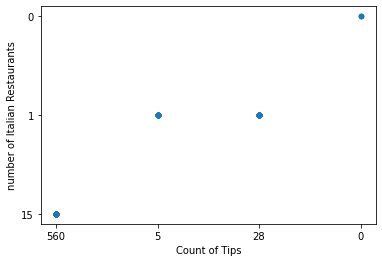

In [98]:
last_frame.plot.scatter(x = 'Count of Tips', y = 'number of Italian Restaurants')

## df is designed for k-means modelling

## 13 crimes in 02114, 0 in others

In [99]:
data = {'postalCode':  ['02113', '02108','02109','02114','02110','02111','02201-1001'],
        'Average Ranking of Italian Restaurant': [8.2, 8.3,8.6, 0, 0, 0, 0],
         'Count of Tips':[560, 5, 28, 0, 0, 0, 0],
        'Average of House Prices':[981968.24,1516433.33,981968.24,981968.24,541200,981968.24,981968.24],
        'Number of Crime Incidents':[0,0,0,13,0,0,0],
        'Number of Italian Restaurants': [15,1,1,0,0,0,0]
       
        }

df = pd.DataFrame (data, columns = ['postalCode','Average Ranking of Italian Restaurant','Count of Tips','Average of House Prices','Number of Crime Incidents','Number of Italian Restaurants'])
df

,postalCode,Average Ranking of Italian Restaurant,Count of Tips,Average of House Prices,Number of Crime Incidents,Number of Italian Restaurants
0,02113,8.2,560,981968.24,0,15
1,02108,8.3,5,1516433.33,0,1
2,02109,8.6,28,981968.24,0,1
3,02114,0.0,0,981968.24,13,0
4,02110,0.0,0,541200.00,0,0
5,02111,0.0,0,981968.24,0,0
6,02201-1001,0.0,0,981968.24,0,0


## Checking for correlation between features

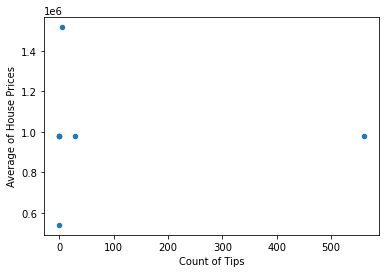

In [100]:
df.plot.scatter(x = 'Count of Tips', y = 'Average of House Prices')

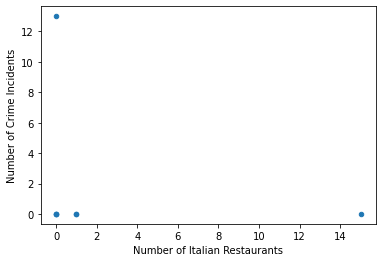

In [101]:
df.plot.scatter(x = 'Number of Italian Restaurants', y = 'Number of Crime Incidents')

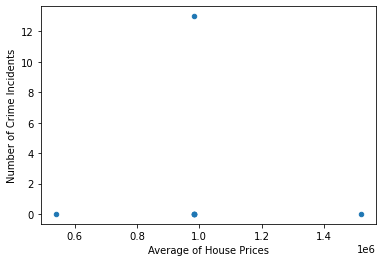

In [102]:
df.plot.scatter(x = 'Average of House Prices', y = 'Number of Crime Incidents')

## K-MEANS

In [107]:
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt  
from matplotlib import style 


In [108]:
X = df.values[:,1:]


In [109]:
from sklearn.preprocessing import StandardScaler
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

array([[ 1.11404482,  2.44657884, -0.0511865 , -0.40824829,  2.44068086],
       [ 1.1381882 , -0.41033694,  1.99265777, -0.40824829, -0.2773501 ],
       [ 1.21061836, -0.29194223, -0.0511865 , -0.40824829, -0.2773501 ],
       [-0.86571285, -0.43607492, -0.0511865 ,  2.44948974, -0.47149517],
       [-0.86571285, -0.43607492, -1.73672529, -0.40824829, -0.47149517],
       [-0.86571285, -0.43607492, -0.0511865 , -0.40824829, -0.47149517],
       [-0.86571285, -0.43607492, -0.0511865 , -0.40824829, -0.47149517]])

## Looking for optimal value of k, since elbow point is at k=3, we select k=3

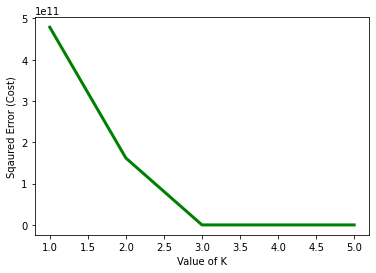

In [112]:
cost =[] 
for i in range(1, 6): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(X) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)      
  
# plot the cost against K values 
plt.plot(range(1, 6), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 
  
# the point of the elbow is the  
# most optimal value for choosing k 

In [113]:
num_clusters = 3

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_

print(labels)

[2 1 1 0 0 0 0]


In [114]:
df["Labels"] = labels

## What these labels indicate?

In [115]:
df.groupby('Labels').mean()


,Average Ranking of Italian Restaurant,Count of Tips,Average of House Prices,Number of Crime Incidents,Number of Italian Restaurants
Labels,,,,,
0,0.00,0.0,871776.180,3.25,0.0
1,8.45,16.5,1249200.785,0.00,1.0
2,8.20,560.0,981968.240,0.00,15.0


In [116]:
df

,postalCode,Average Ranking of Italian Restaurant,Count of Tips,Average of House Prices,Number of Crime Incidents,Number of Italian Restaurants,Labels
0,02113,8.2,560,981968.24,0,15,2
1,02108,8.3,5,1516433.33,0,1,1
2,02109,8.6,28,981968.24,0,1,1
3,02114,0.0,0,981968.24,13,0,0
4,02110,0.0,0,541200.00,0,0,0
5,02111,0.0,0,981968.24,0,0,0
6,02201-1001,0.0,0,981968.24,0,0,0


In [117]:
map_frame=pd.merge(df, last_frame, on="postalCode")
map_frame

,postalCode,Average Ranking of Italian Restaurant_x,Count of Tips_x,Average of House Prices,Number of Crime Incidents,Number of Italian Restaurants,Labels,Average Ranking of Italian Restaurant_y,Count of Tips_y,categories,lat,lng,id,number of Italian Restaurants
0,02113,8.2,560,981968.24,0,15,2,8.2,560,Park,42.362488,-71.056477,4ba50617f964a520f1d138e3,15
1,02113,8.2,560,981968.24,0,15,2,8.2,560,Seafood Restaurant,42.363237,-71.056139,4ac53112f964a520dbb020e3,15
2,02113,8.2,560,981968.24,0,15,2,8.2,560,Sandwich Place,42.363292,-71.056068,4dea5487d164ef597ce79171,15
3,02113,8.2,560,981968.24,0,15,2,8.2,560,Comedy Club,42.362931,-71.055404,40b28c80f964a520d5f71ee3,15
4,02113,8.2,560,981968.24,0,15,2,8.2,560,Deli / Bodega,42.363071,-71.055041,53a74381498e34ef9a6217ea,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,02109,8.6,28,981968.24,0,1,1,8.6,28,Café,42.358467,-71.057648,5bd8f4b4f709c1002cc147cd,1
91,02114,0.0,0,981968.24,13,0,0,0,0,Ski Chalet,42.363679,-71.059239,53dff5aa498e8db166762d66,0
92,02114,0.0,0,981968.24,13,0,0,0,0,Coffee Shop,42.363144,-71.059830,51a49c41498e034cea66e562,0
93,02110,0.0,0,541200.00,0,0,0,0,0,Park,42.361027,-71.051451,4ae3580af964a520c59321e3,0


## plotting the map

In [120]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [119]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
kclusters=3
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(map_frame['lat'], map_frame['lng'], map_frame['postalCode'], map_frame['Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters